In [20]:
# This is my very first machine learning project. My goal is to practice my skills on exploratory data analysis, 
# features selection and engineering, modeling, parameter tuning, and evaluating results.
# Before starting this project, I read a series of Kaggle notebooks created by Kaggler Will Koehsen,  
# where he explained the concepts and procedures of machine learning comprehensibly.
# If you are new to machine learning, I highly recommend that you go though his notebook series of "A Gentle Introduction to Machine Learning"
# https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

# Let's begin by importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
%matplotlib inline

In [21]:
# Let's import the dataset
# This dataset comes from https://www.kaggle.com/mehdidag/black-friday
train = pd.read_csv('C:/Users/Richard Cheung/Desktop/Personal Project I/BlackFriday.csv')
print(train.shape)
train.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:
# Let's make all the column names lowercase and change the column name "purchase" to "target"
train.columns = map(str.lower, train.columns)
train = train.rename(columns = {'purchase': 'target'})

In [23]:
# Organize the dataset by sorting the table based on user_id and target
train = train.sort_values(['user_id', 'target'])
train.head(20)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,target
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
390150,1000001,P0097142,F,0-17,10,A,2,0,12,NaN,NaN,1715
78144,1000001,P00102642,F,0-17,10,A,2,0,4,8.0,9.0,2763
194559,1000001,P00051842,F,0-17,10,A,2,0,4,8.0,NaN,2849
116849,1000001,P00258742,F,0-17,10,A,2,0,5,NaN,NaN,6910
155570,1000001,P00297042,F,0-17,10,A,2,0,8,NaN,NaN,7839
116850,1000001,P00142242,F,0-17,10,A,2,0,8,NaN,NaN,7882
311709,1000001,P00178342,F,0-17,10,A,2,0,8,NaN,NaN,7887
311712,1000001,P00248442,F,0-17,10,A,2,0,3,4.0,NaN,7943


In [24]:
# Let's look at some basic statistis of the columns with numeric values
train.describe()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,target
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [25]:
# What are the data types of dataset columns
train.dtypes

user_id                         int64
product_id                     object
gender                         object
age                            object
occupation                      int64
city_category                  object
stay_in_current_city_years     object
marital_status                  int64
product_category_1              int64
product_category_2            float64
product_category_3            float64
target                          int64
dtype: object

In [26]:
# Let's learn more about the customers
print(train['age'].value_counts())
print(train['city_category'].value_counts())
print(train['stay_in_current_city_years'].value_counts())

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: age, dtype: int64
B    226493
C    166446
A    144638
Name: city_category, dtype: int64
1     189192
2      99459
3      93312
4+     82889
0      72725
Name: stay_in_current_city_years, dtype: int64


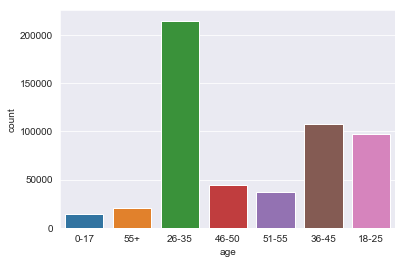

In [27]:
# Graphing the data makes interpretation much easier
# A majority of the customers come from age group, "26-35"
ax = sns.countplot(x = 'age', data = train)

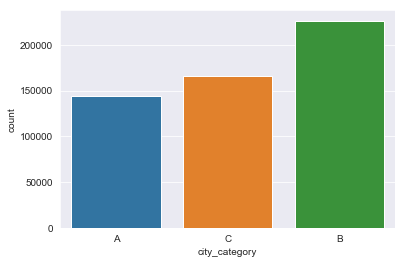

In [28]:
# There are more customers who live in city B
ax = sns.countplot(x = 'city_category', data = train)

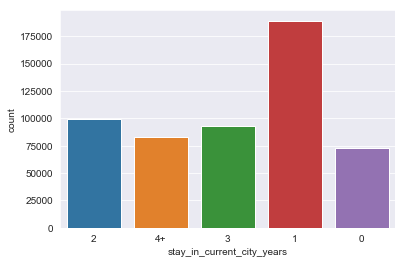

In [29]:
# Many of the customers have only lived in their cities for a year
ax = sns.countplot(x = 'stay_in_current_city_years', data = train)

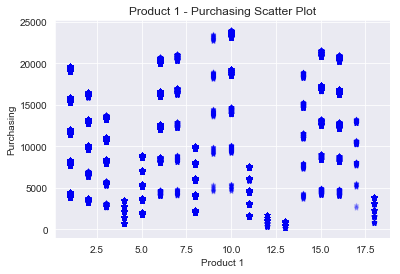

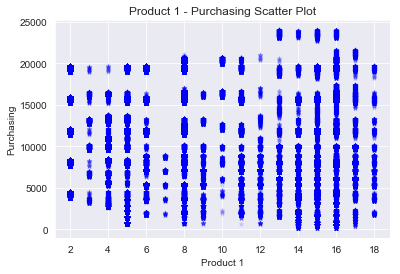

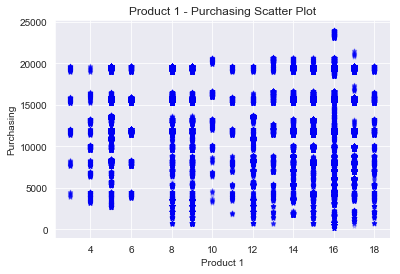

In [30]:
# Let's understand the relatioship between purchase quantities of product categories and purchase amounts
# It looks customers that made purchases in product category 2 and 3 tend to have higher purchase amounts
train.plot(kind = 'scatter', 
           x = 'product_category_1', 
           y = 'target', 
           alpha = 0.1, 
           color = 'blue', 
           marker='*')
plt.xlabel('Product 1')
plt.ylabel('Purchasing')
plt.title('Product 1 - Purchasing Scatter Plot')          
plt.show()

train.plot(kind = 'scatter', 
           x = 'product_category_2', 
           y = 'target', 
           alpha = 0.1, 
           color = 'blue', 
           marker='*')
plt.xlabel('Product 1')
plt.ylabel('Purchasing')
plt.title('Product 1 - Purchasing Scatter Plot')          
plt.show()

train.plot(kind = 'scatter', 
           x = 'product_category_3', 
           y = 'target', 
           alpha = 0.1, 
           color = 'blue', 
           marker='*')
plt.xlabel('Product 1')
plt.ylabel('Purchasing')
plt.title('Product 1 - Purchasing Scatter Plot')          
plt.show()

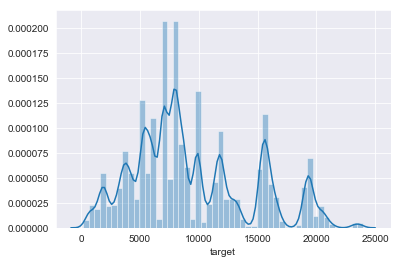

In [32]:
# 'target' is the variable that we need to predict, so let's do some analysis on it.
# let's take a look at the distribution of it
sns.distplot(train['target'])

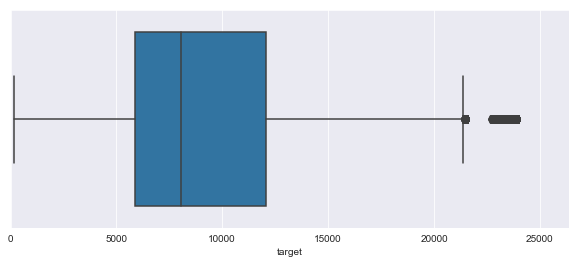

In [33]:
# Checking for outliers
# There are apparently some outliers 
plt.figure(figsize =  (10, 4))
plt.xlim(train.target.min()*.1, train.target.max()*1.1)
sns.boxplot(x = train.target)

In [39]:
# Calculate the number of outliers we have
# Outliers removal is not always safe. Since their values are not significantly deviated from the upper fence, I decided not to remove them. 
low = np.percentile(train.target, 25)
high = np.percentile(train.target, 75)
iqr = high - low
iqr15 = iqr * 1.5
lower_fence = low - iqr15
upper_fence = high + iqr15
print(lower_fence, upper_fence)
train.loc[train['target'] > upper_fence, 'target']

-3444.5 21383.5


506668    21450
39257     22795
311778    23089
311777    23768
194671    21468
78293     23085
390286    23520
155738    23209
467878    23257
155794    23425
194853    21562
234015    23087
194854    23853
234048    21404
155899    21500
273120    21568
351134    23474
343       23603
429217    23907
117187    23608
429269    23222
375       23792
468021    21505
351182    23548
117252    23457
117253    23847
155989    21421
351239    21468
195000    23371
39621     23491
          ...  
311375    23866
350490    23183
233407    23653
155275    23129
350517    23131
116545    23143
38908     23451
389848    23826
194277    23933
389895    23819
428647    23857
311520    23271
194420    21450
272675    23799
78019     22942
311579    23268
116708    23280
39070     23640
233621    23477
311619    23285
506509    23856
350725    23202
467592    23513
467591    23703
390116    23254
506540    23525
78116     23714
350782    23727
78131     23920
116841    23251
Name: target, Length: 26

In [40]:
# Use a function to determine missing values in our table
def missing_value_table(df):
    
    mis_val = df.isnull().sum()
    
    mis_val_percentage = 100 * mis_val / len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percentage], axis = 1)
    
    mis_val_table = mis_val_table.rename(columns = {0: 'Missing Values', 
                                                    1: '% of Total Missing Values'})
    
    mis_val_table = mis_val_table[
        mis_val_table.iloc[:, 1] != 0].sort_values(
        '% of Total Missing Values', ascending = False).round(1)
    
    print("The dataframe has " + str(df.shape[0]) + " columns.\n"
         "There are  " + str(mis_val_table.shape[0]) + 
         " columns that have missing values.")
    
    return mis_val_table

In [14]:
# What columns in our table have missing value?
# Only product_category_2 and product_category_3 have missing values
missing_values = missing_value_table(train)
missing_values.head(10)

The dataframe has 537577 columns.
There are  2 columns that have missing values.


,Missing Values,% of Total Missing Values
product_category_3,373299,69.4
product_category_2,166986,31.1


In [15]:
# Judging from the table, we can safely assume that some customers decided not to make purchases in product category 2 or 3.
# Therefore, we can fill in with 0s.
train = train.fillna(0)

In [16]:
# We will use theses variables later on
user_id = train['user_id']
product_id = train['product_id']
target = train['target']

In [17]:
# Dropping the user_id and product_id columns for the One-Hot encoding procedure
train = train.drop(columns = ['user_id', 'product_id'])

In [18]:
# As you can see from the table, quite a few columns have variables that are non-numeric.
# A machine learning model unfortunately cannot deal with categorical variables.
# Therefore, we have to represent(encode) these variables as numbers so our machine learning model can process them.
# I choose to use the method of one-hot encoding to do that.
# This will only encode the columns with object data type.
train = pd.get_dummies(train)
train.head()

,occupation,marital_status,product_category_1,product_category_2,product_category_3,target,gender_F,gender_M,age_0-17,age_18-25,...,age_51-55,age_55+,city_category_A,city_category_B,city_category_C,stay_in_current_city_years_0,stay_in_current_city_years_1,stay_in_current_city_years_2,stay_in_current_city_years_3,stay_in_current_city_years_4+
0,10,0,3,0.0,0.0,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,0.0,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0.0,0.0,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [19]:
# The Occupation column did not get encoded because its data type is int64
# You can first convert it to object type before executing one-hot encoding
# I didn't do that beforehand, so I have to do it separately
occ = pd.get_dummies(train['occupation'])
occ.columns = ['occupation_type#' + str(col) for col in occ.columns]
occ.head()

,occupation_type#0,occupation_type#1,occupation_type#2,occupation_type#3,occupation_type#4,occupation_type#5,occupation_type#6,occupation_type#7,occupation_type#8,occupation_type#9,...,occupation_type#11,occupation_type#12,occupation_type#13,occupation_type#14,occupation_type#15,occupation_type#16,occupation_type#17,occupation_type#18,occupation_type#19,occupation_type#20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# Merge the Occupation column back to the table
train = pd.concat([train, occ], axis = 1)
train = train.drop(columns = ['occupation'])
train.head()

,marital_status,product_category_1,product_category_2,product_category_3,target,gender_F,gender_M,age_0-17,age_18-25,age_26-35,...,occupation_type#11,occupation_type#12,occupation_type#13,occupation_type#14,occupation_type#15,occupation_type#16,occupation_type#17,occupation_type#18,occupation_type#19,occupation_type#20
0,0,3,0.0,0.0,8370,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,6.0,14.0,15200,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,12,0.0,0.0,1422,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,12,14.0,0.0,1057,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,8,0.0,0.0,7969,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Let's look at the correlations between target and all the other variables
corr = train.corr()['target'].sort_values()

print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 age_55+                         0.004847
occupation_type#16              0.005442
stay_in_current_city_years_2    0.006098
age_36-45                       0.006787
occupation_type#14              0.010773
occupation_type#7               0.011729
age_51-55                       0.015792
occupation_type#15              0.016020
occupation_type#12              0.027005
occupation_type#17              0.032187
product_category_2              0.038395
gender_M                        0.060086
city_category_C                 0.068647
product_category_3              0.284120
target                          1.000000
Name: target, dtype: float64

Most Negative Correlations:
 product_category_1             -0.314125
gender_F                       -0.060086
city_category_A                -0.045780
occupation_type#20             -0.023212
city_category_B                -0.023161
occupation_type#1              -0.019410
occupation_type#19             -0.014618
occupation

In [22]:
# Both product category 1 and product category 3 have quite strong correlation with the target variable
# It seems like male and people living in city C tend to spend more
# while female and people living in city A tend to spend less
# Let's set the cutoff value at +/- 0.04 and find out the correlations between the variables
data = train[['target', 'product_category_1', 'gender_F', 'city_category_A',
                'product_category_3', 'city_category_C', 'gender_M', 
                'product_category_2']]
data_corr = data.corr()
data_corr

,target,product_category_1,gender_F,city_category_A,product_category_3,city_category_C,gender_M,product_category_2
target,1.000000,-0.314125,-0.060086,-0.045780,0.284120,0.068647,0.060086,0.038395
product_category_1,-0.314125,1.000000,0.045661,0.022887,-0.389048,-0.023137,-0.045661,-0.040730
gender_F,-0.060086,0.045661,1.000000,-0.007416,-0.035813,-0.000329,-1.000000,0.001580
city_category_A,-0.045780,0.022887,-0.007416,1.000000,-0.028082,-0.406305,0.007416,-0.012915
product_category_3,0.284120,-0.389048,-0.035813,-0.028082,1.000000,0.035090,0.035813,0.090284
city_category_C,0.068647,-0.023137,-0.000329,-0.406305,0.035090,1.000000,0.000329,0.019709
gender_M,0.060086,-0.045661,-1.000000,0.007416,0.035813,0.000329,1.000000,-0.001580
product_category_2,0.038395,-0.040730,0.001580,-0.012915,0.090284,0.019709,-0.001580,1.000000


Text(0.5,1,'Correlation Heatmap')

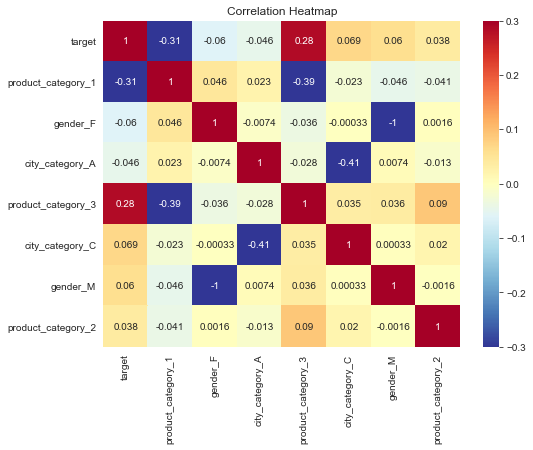

In [23]:
# Use heatmap to better viuslize the correlation values
# Product category 1 and 3 are negatively correlated,
# which means when customers purchase products from one of the two categories,
# they tend not to buy the products from the other one.
plt.figure(figsize = (8, 6))

sns.heatmap(data_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.3, annot = True, vmax = 0.3)
plt.title('Correlation Heatmap')

In [24]:
# Now we can start making more features.
# Feature engineering is often considered as the pivotal part of machine learning.
# It is the process of adding new features from the existing data
# and choosing only the most important features.
# Kaggle winners are always the ones who can create the most useful features out of the data.
# Let's create as many features as possible and choose only the useful ones later on.
# Start by adding back the Product ID column
train['product_id'] = product_id
train.head()

In [26]:
# This function will return the aggregated statistics on a GROUPBY variable
# The aggregated statistics are count, average, maximum, minimum, and sum
def agg_numeric(df, group_var, df_name):
    
    agg = df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
    
    columns = [group_var]
    
    for var in agg.columns.levels[0]:
        
        if var != group_var:
            
            for stat in agg.columns.levels[1][:-1]:
                
                columns.append('%s_%s_%s' % (df_name, var, stat))
                
    agg.columns = columns
    
    return agg

In [27]:
# We are dropping the target column because it is not part of the features
# Let's get the aggregated statistics on Product ID
train = train.drop(columns = ['target'])
train_agg = agg_numeric(train, group_var = 'product_id', df_name = 'product_id_agg')
train_agg.head()

,product_id,product_id_agg_marital_status_count,product_id_agg_marital_status_mean,product_id_agg_marital_status_max,product_id_agg_marital_status_min,product_id_agg_marital_status_sum,product_id_agg_product_category_1_count,product_id_agg_product_category_1_mean,product_id_agg_product_category_1_max,product_id_agg_product_category_1_min,...,product_id_agg_occupation_type#19_count,product_id_agg_occupation_type#19_mean,product_id_agg_occupation_type#19_max,product_id_agg_occupation_type#19_min,product_id_agg_occupation_type#19_sum,product_id_agg_occupation_type#20_count,product_id_agg_occupation_type#20_mean,product_id_agg_occupation_type#20_max,product_id_agg_occupation_type#20_min,product_id_agg_occupation_type#20_sum
0,P00000142,1130,0.375221,1,0,424,1130,3,3,3,...,1130,0.012389,1,0,14,1130,0.055752,1,0,63
1,P00000242,371,0.369272,1,0,137,371,2,2,2,...,371,0.016173,1,0,6,371,0.048518,1,0,18
2,P00000342,238,0.399160,1,0,95,238,5,5,5,...,238,0.016807,1,0,4,238,0.042017,1,0,10
3,P00000442,92,0.413043,1,0,38,92,5,5,5,...,92,0.021739,1,0,2,92,0.043478,1,0,4
4,P00000542,146,0.308219,1,0,45,146,5,5,5,...,146,0.020548,1,0,3,146,0.061644,1,0,9


In [28]:
# Now we will get the aggregated statistics on USER ID
# Adding the USER ID column back to the table
train['user_id'] = user_id
train.head()

,marital_status,product_category_1,product_category_2,product_category_3,gender_F,gender_M,age_0-17,age_18-25,age_26-35,age_36-45,...,occupation_type#13,occupation_type#14,occupation_type#15,occupation_type#16,occupation_type#17,occupation_type#18,occupation_type#19,occupation_type#20,product_id,user_id
0,0,3,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,P00069042,1000001
1,0,1,6.0,14.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,P00248942,1000001
2,0,12,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,P00087842,1000001
3,0,12,14.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,P00085442,1000001
4,0,8,0.0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,P00285442,1000002


In [29]:
# We are dropping the Product ID column because we have collected its aggregated statistics.
train = train.drop(columns = ['product_id'])
train.head()

,marital_status,product_category_1,product_category_2,product_category_3,gender_F,gender_M,age_0-17,age_18-25,age_26-35,age_36-45,...,occupation_type#12,occupation_type#13,occupation_type#14,occupation_type#15,occupation_type#16,occupation_type#17,occupation_type#18,occupation_type#19,occupation_type#20,user_id
0,0,3,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1000001
1,0,1,6.0,14.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1000001
2,0,12,0.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1000001
3,0,12,14.0,0.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1000001
4,0,8,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1000002


In [30]:
train_agg2 = agg_numeric(train, group_var = 'user_id', df_name = 'user_id_agg')
train_agg2.head()

,user_id,user_id_agg_marital_status_count,user_id_agg_marital_status_mean,user_id_agg_marital_status_max,user_id_agg_marital_status_min,user_id_agg_marital_status_sum,user_id_agg_product_category_1_count,user_id_agg_product_category_1_mean,user_id_agg_product_category_1_max,user_id_agg_product_category_1_min,...,user_id_agg_occupation_type#19_count,user_id_agg_occupation_type#19_mean,user_id_agg_occupation_type#19_max,user_id_agg_occupation_type#19_min,user_id_agg_occupation_type#19_sum,user_id_agg_occupation_type#20_count,user_id_agg_occupation_type#20_mean,user_id_agg_occupation_type#20_max,user_id_agg_occupation_type#20_min,user_id_agg_occupation_type#20_sum
0,1000001,34,0,0,0,0,34,5.676471,16,1,...,34,0,0,0,0.0,34,0,0,0,0.0
1,1000002,76,0,0,0,0,76,4.394737,8,1,...,76,0,0,0,0.0,76,0,0,0,0.0
2,1000003,29,0,0,0,0,29,3.206897,18,1,...,29,0,0,0,0.0,29,0,0,0,0.0
3,1000004,13,1,1,1,13,13,1.000000,1,1,...,13,0,0,0,0.0,13,0,0,0,0.0
4,1000005,106,1,1,1,106,106,6.216981,16,1,...,106,0,0,0,0.0,106,1,1,1,106.0


In [31]:
# Now we need to merge the train_agg and train_agg2 tables with the original table
# In order to merge the tables together, they need to have a common column.
# Adding back the Product ID column to the train table
train['product_id'] = product_id

In [32]:
# Merging train_agg with train
train = train.merge(train_agg, on = 'product_id', how = 'left')
train.head()
train.shape

(537577, 254)

In [33]:
# Merging train_agg2 with train
# Great! Now we have 462 features! (USER ID and Product ID are excluded)
train = train.merge(train_agg2, on = 'user_id', how = 'left')
print(train.shape)
train.head()

(537577, 464)


,marital_status,product_category_1,product_category_2,product_category_3,gender_F,gender_M,age_0-17,age_18-25,age_26-35,age_36-45,...,user_id_agg_occupation_type#19_count,user_id_agg_occupation_type#19_mean,user_id_agg_occupation_type#19_max,user_id_agg_occupation_type#19_min,user_id_agg_occupation_type#19_sum,user_id_agg_occupation_type#20_count,user_id_agg_occupation_type#20_mean,user_id_agg_occupation_type#20_max,user_id_agg_occupation_type#20_min,user_id_agg_occupation_type#20_sum
0,0,3,0.0,0.0,1,0,1,0,0,0,...,34,0,0,0,0.0,34,0,0,0,0.0
1,0,1,6.0,14.0,1,0,1,0,0,0,...,34,0,0,0,0.0,34,0,0,0,0.0
2,0,12,0.0,0.0,1,0,1,0,0,0,...,34,0,0,0,0.0,34,0,0,0,0.0
3,0,12,14.0,0.0,1,0,1,0,0,0,...,34,0,0,0,0.0,34,0,0,0,0.0
4,0,8,0.0,0.0,0,1,0,0,0,0,...,76,0,0,0,0.0,76,0,0,0,0.0


In [34]:
# Now it's time to explore these features relationship with the target variable
# Then we can select only useful features
# Adding back the target column
train['target'] = target

In [35]:
# Getting the correlations of the features
corrs = train.corr()

In [36]:
# Sorting the target column so that highest correlation values appear on top
corrs = corrs.sort_values('target', ascending = False)

In [37]:
# Let's look at the top 20 features with postive correlation
# Many of the Product ID aggregated features top the chart!
pd.DataFrame(corrs['target'].head(20))

,target
target,1.000000
product_id_agg_occupation_type#17_sum,0.380002
product_id_agg_gender_M_sum,0.364620
product_id_agg_occupation_type#12_sum,0.357812
product_id_agg_occupation_type#7_sum,0.348402
product_id_agg_occupation_type#15_sum,0.345557
product_id_agg_product_category_3_sum,0.343931
product_id_agg_age_36-45_sum,0.335060
product_id_agg_age_26-35_sum,0.331754
product_id_agg_occupation_type#14_sum,0.330421


In [38]:
# Let's look at the top 20 features with negative correlation
# A mixture of USER ID and Product ID aggregated features appear here
pd.DataFrame(corrs['target'].dropna().tail(20))

,target
user_id_agg_occupation_type#11_count,-0.100825
user_id_agg_age_0-17_count,-0.100825
user_id_agg_stay_in_current_city_years_3_count,-0.100825
user_id_agg_occupation_type#9_count,-0.100825
user_id_agg_age_18-25_count,-0.100825
user_id_agg_age_36-45_count,-0.100825
user_id_agg_age_26-35_count,-0.100825
product_id_agg_occupation_type#0_mean,-0.104791
product_id_agg_occupation_type#3_mean,-0.108512
product_id_agg_age_0-17_mean,-0.110468


In [39]:
# Now we can address the issue of collinear features
# They are the variables that are highly correlated with one another
# These can decrease the model's availablility to learn, decrease model interpretability,
# and decrease generalization performance on the test set
# We can establish a threshold for removing collinear variables
# I choose 0.8
threshold = 0.8

above_threshold_vars = {}

for col in corrs:
    
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [40]:
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

for key, value in above_threshold_vars.items():
    
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
             if x not in cols_seen:
                    cols_to_remove.append(x)
                    cols_to_remove_pair.append(key)
                    
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  263


In [41]:
# Removing the collinear variables
train_corrs_removed = train.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)

Training Corrs Removed Shape:  (537577, 202)


In [42]:
# Now we will split the train table into a training and testing dataset at 80/20 ratio
# We will use the training dataset to train our models,
# and use the testing dataset to evaluate the accuracy of the models.
# Therefore, our models will not "see" the testing dataset until the very end
train = train_corrs_removed
test = train.sample(frac = 0.2, random_state = 42)
test.head()

,marital_status,product_category_1,product_category_2,product_category_3,gender_F,gender_M,age_0-17,age_18-25,age_26-35,age_36-45,...,user_id_agg_occupation_type#7_sum,user_id_agg_occupation_type#8_sum,user_id_agg_occupation_type#9_sum,user_id_agg_occupation_type#13_sum,user_id_agg_occupation_type#14_sum,user_id_agg_occupation_type#16_sum,user_id_agg_occupation_type#17_sum,user_id_agg_occupation_type#18_sum,user_id_agg_occupation_type#20_sum,target
287383,0,1,2.0,15.0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,8058
130087,0,1,16.0,0.0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,305.0,0.0,0.0,0.0,0.0,19297
104368,1,8,0.0,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6121
370791,0,8,16.0,0.0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8130
121991,0,5,14.0,0.0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8676


In [43]:
# Removing the testing data from the training table
train = train[~train.index.isin(test.index)]
train.shape

(430062, 202)

In [44]:
# Dropping the columns from the training table that we will not use to train our models
X = train.drop(columns = {'user_id', 'target', 'product_id'})
y = train['target']
X.shape

(430062, 199)

In [45]:
# Same applies to the testing table
test_features = test.drop(columns = {'user_id', 'target', 'product_id'})
test_labels = test['target']
test_features.shape

(107515, 199)

In [46]:
# importing the libraries that are used for cross-validation and modeling
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [47]:
# We will select our features based on their feature importances
# We will use LightGBM model to assess feature importance.
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X.shape[1])

modelLGB = lgb.LGBMRegressor(objective = 'regression',
                             boosting_type = 'gbdt',
                             n_estimators = 10000
                             )

In [48]:
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                      y,
                                                      test_size = 0.2,
                                                      random_state = i)
    
    # Setting the early stopping rounds at 100,
    # so the model would continue training until validation scores don't improve for 100 rounds.
    # We will use root mean squared error as our evaluation metrics for the model
    modelLGB.fit(X_train, 
                 y_train, 
                 early_stopping_rounds = 100,
                 eval_set = [(X_val, y_val)],
                 eval_metric = 'rmse',
                 verbose = 200)
    
    # Record the feature importances
    feature_importances += modelLGB.feature_importances_

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 2574.59
[400]	valid_0's rmse: 2534.58
[600]	valid_0's rmse: 2514.99
[800]	valid_0's rmse: 2504.62
[1000]	valid_0's rmse: 2496.44
[1200]	valid_0's rmse: 2492.05
[1400]	valid_0's rmse: 2489.12
[1600]	valid_0's rmse: 2486.74
[1800]	valid_0's rmse: 2484.43
[2000]	valid_0's rmse: 2482.13
[2200]	valid_0's rmse: 2481.13
[2400]	valid_0's rmse: 2480.02
[2600]	valid_0's rmse: 2478.78
[2800]	valid_0's rmse: 2478.47
Early stopping, best iteration is:
[2733]	valid_0's rmse: 2478.35
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 2597.01
[400]	valid_0's rmse: 2556.19
[600]	valid_0's rmse: 2536.61
[800]	valid_0's rmse: 2523.84
[1000]	valid_0's rmse: 2515.18
[1200]	valid_0's rmse: 2510.63
[1400]	valid_0's rmse: 2507.28
[1600]	valid_0's rmse: 2503.56
[1800]	valid_0's rmse: 2500.65
[2000]	valid_0's rmse: 2499.23
[2200]	valid_0's rmse: 2498.62
[2400]	valid_0's rmse: 2498.09
[2600]	val

In [49]:
# Avergeing the feature importances
# Let's look at the features with highest value of importance
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head(15)

,feature,importance
163,user_id_agg_product_category_1_mean,3775.5
166,user_id_agg_product_category_2_mean,3625.5
169,user_id_agg_product_category_3_mean,3476.5
161,user_id_agg_marital_status_count,3226.0
1,product_category_1,2584.5
46,product_id_agg_product_category_1_sum,1838.0
49,product_id_agg_gender_F_mean,1658.5
149,product_id_agg_occupation_type#17_mean,1611.5
134,product_id_agg_occupation_type#12_mean,1566.0
158,product_id_agg_occupation_type#20_mean,1541.0


In [50]:
# let's look at the features with 0 importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])

print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(15)

There are 70 features with 0.0 importance


,feature,importance
128,product_id_agg_occupation_type#9_max,0.0
54,product_id_agg_gender_M_min,0.0
113,product_id_agg_occupation_type#4_min,0.0
125,product_id_agg_occupation_type#8_min,0.0
124,product_id_agg_occupation_type#8_max,0.0
122,product_id_agg_occupation_type#7_min,0.0
121,product_id_agg_occupation_type#7_max,0.0
57,product_id_agg_age_0-17_min,0.0
119,product_id_agg_occupation_type#6_min,0.0
118,product_id_agg_occupation_type#6_max,0.0


In [51]:
# This function will return a bar chart of feature importances
def plot_feature_importances(df, threshold = 0.9):
    
    plt.rcParams['font.size'] = 18
    
    df = df.sort_values('importance', ascending = False).reset_index()
    
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center',
            edgecolor = 'k')
    
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    plt.xlabel('Normalized Importance'); plt.title('Feature Importance')
    plt.show()
    
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance');
    plt.title('Cumulative Feature Importance');
    plt.show()
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

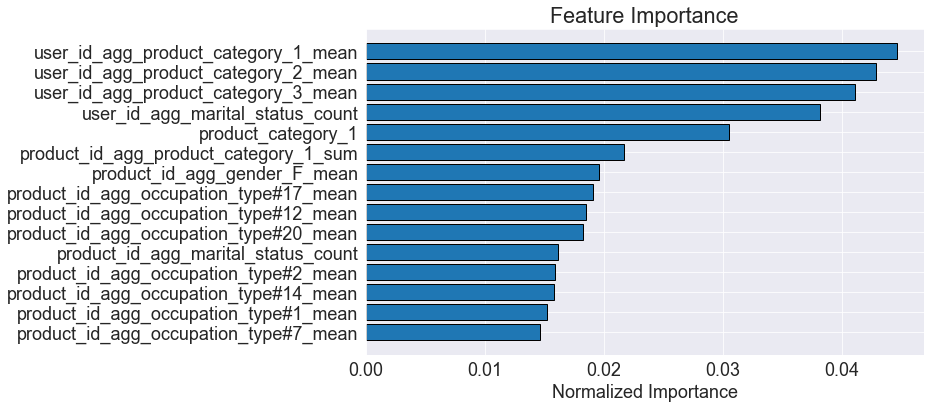

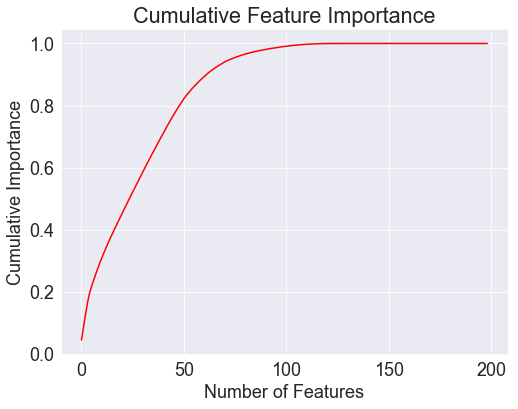

62 features required for 0.90 of cumulative importance


In [52]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [53]:
# Removing the features that have 0 importances
# Doing that for both the training and testing tables
# That leaves us with 129 features
X = X.drop(columns = zero_features)
test_features = test_features.drop(columns = zero_features)
print('Training shape: ', X.shape)
print('test_features', test_features.shape)

Training shape:  (430062, 129)
test_features (107515, 129)


In [54]:
# This function will run the LightGBM model and return the features with 0 importances
def identify_zero_importance_features(train, train_labels, iterations = 2):
    
    feature_importances = np.zeros(train.shape[1])
    
    model = lgb.LGBMRegressor(objective = 'regression',
                              boosting_type = 'gbdt',
                              n_estimators = 10000
                              )
    
    for i in range(iterations):
        
        X_train, X_val, y_train, y_val = train_test_split(train,
                                                          train_labels,
                                                          test_size = 0.2,
                                                          random_state = i)
    
        modelLGB.fit(X_train, 
                     y_train, 
                     early_stopping_rounds = 100,
                     eval_set = [(X_val, y_val)],
                     eval_metric = 'mae',
                     verbose = 200)
    
        feature_importances += modelLGB.feature_importances_
        
    feature_importances = feature_importances / 2
    feature_importances = pd.DataFrame({'feature': list(train.columns),
                                        'importance': feature_importances}).sort_values('importance', ascending = False)
    
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    
    print('There are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [55]:
# Let's see if we have more features with 0 importance
# There 2 more features with 0 importance
second_round_zero_features, feature_importances = identify_zero_importance_features(X, y)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l1: 1914.46
[400]	valid_0's l1: 1882.15
[600]	valid_0's l1: 1866.1
[800]	valid_0's l1: 1855.92
[1000]	valid_0's l1: 1849.4
[1200]	valid_0's l1: 1845.51
[1400]	valid_0's l1: 1842.41
[1600]	valid_0's l1: 1840.47
[1800]	valid_0's l1: 1838.55
[2000]	valid_0's l1: 1837.48
[2200]	valid_0's l1: 1836.51
[2400]	valid_0's l1: 1835.11
[2600]	valid_0's l1: 1834.3
[2800]	valid_0's l1: 1833.29
Early stopping, best iteration is:
[2850]	valid_0's l1: 1832.91
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l1: 1927.98
[400]	valid_0's l1: 1892.95
[600]	valid_0's l1: 1877.28
[800]	valid_0's l1: 1866.51
[1000]	valid_0's l1: 1859.28
[1200]	valid_0's l1: 1854.11
[1400]	valid_0's l1: 1850.72
[1600]	valid_0's l1: 1848.29
[1800]	valid_0's l1: 1846.45
[2000]	valid_0's l1: 1844.27
[2200]	valid_0's l1: 1843.18
[2400]	valid_0's l1: 1841.86
[2600]	valid_0's l1: 1841.32
[2800]	valid_0's l1: 1840.91
[3000]	va

In [56]:
X = X.drop(columns = second_round_zero_features)
test_features = test_features.drop(columns = second_round_zero_features)
print('Training shape: ', X.shape)
print('test_features', test_features.shape)

Training shape:  (430062, 127)
test_features (107515, 127)


In [57]:
# Let's run the function again to see if there are more features with 0 importance
# There aren't anymore
third_round_zero_features, feature_importances = identify_zero_importance_features(X, y)

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l1: 1914.46
[400]	valid_0's l1: 1882.15
[600]	valid_0's l1: 1866.1
[800]	valid_0's l1: 1855.92
[1000]	valid_0's l1: 1849.4
[1200]	valid_0's l1: 1845.51
[1400]	valid_0's l1: 1842.41
[1600]	valid_0's l1: 1840.47
[1800]	valid_0's l1: 1838.55
[2000]	valid_0's l1: 1837.48
[2200]	valid_0's l1: 1836.51
[2400]	valid_0's l1: 1835.11
[2600]	valid_0's l1: 1834.3
[2800]	valid_0's l1: 1833.29
Early stopping, best iteration is:
[2850]	valid_0's l1: 1832.91
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's l1: 1927.98
[400]	valid_0's l1: 1892.95
[600]	valid_0's l1: 1877.28
[800]	valid_0's l1: 1866.51
[1000]	valid_0's l1: 1859.28
[1200]	valid_0's l1: 1854.11
[1400]	valid_0's l1: 1850.72
[1600]	valid_0's l1: 1848.29
[1800]	valid_0's l1: 1846.45
[2000]	valid_0's l1: 1844.27
[2200]	valid_0's l1: 1843.18
[2400]	valid_0's l1: 1841.86
[2600]	valid_0's l1: 1841.32
[2800]	valid_0's l1: 1840.91
[3000]	va

In [58]:
# Writing the training table into a csv file for the purpose of model parameters tuning
training_data = X
training_data['target'] = y

training_data.to_csv('training_data2.csv', index = False)

In [59]:
X = X.drop(columns = {'target'})

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
test_features = scaler.transform(test_features)

In [60]:
# We will use 3 models and see which one performs the best
# They are linear regression, random forest, and LightGBM
# We will use K-fold cross-validation to validate the models
n_folds = 5

def rmse_cv(model):
    
    kfold = KFold(n_splits = n_folds, 
                  shuffle = True, 
                  random_state = 42)
    
    cv_results = np.sqrt(-cross_val_score(model, 
                                          X, 
                                          y, 
                                          cv = kfold, 
                                          scoring = 'neg_mean_squared_error', 
                                          n_jobs = -1))
    
    return cv_results

In [61]:
# Linear regression gives us a rmse score of 4239
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

score = rmse_cv(lr_model)

print("Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Linear Regression score: 4239.4885 (17.5651)



In [63]:
# Random Forest gives us a rmse score of 2734! A much improved score!
RF_model = RandomForestRegressor(random_state = 42)

score = rmse_cv(RF_model)

print("Random Forest Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest Regression score: 2734.4224 (8.7076)



In [64]:
# LightGBM gives us 2622! Even lower than Random Forest!
lgbm_model = lgb.LGBMRegressor(random_state = 42)

score = rmse_cv(lgbm_model)

print("LightGBM Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LightGBM Regression score: 2622.7240 (9.0501)



In [65]:
# I used a separate notebook to perform parameter tuning
# using grid search and bayesian optimization
grid_search_params = {'boosting_type': 'gbdt',
                     'colsample_bytree': 0.6,
                     'is_unbalance': True,
                     'learning_rate': 0.004999999999999999,
                     'metric': 'rmse',
                     'min_child_samples': 20,
                     'n_estimators': 4599,
                     'num_leaves': 20,
                     'reg_alpha': 0.0,
                     'reg_lambda': 0.0,
                     'subsample': 0.5,
                     'subsample_for_bin': 20000,
                     'verbose': 1}

lgbm_model_2 = lgb.LGBMRegressor(**grid_search_params,
                                 random_state = 42,
                                 n_jobs = -1)

score = rmse_cv(lgbm_model_2)

print("LightGBM Regression with GridSearch parameters score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LightGBM Regression with GridSearch parameters score: 2602.5785 (7.9617)



In [66]:
# Bayesian outperforms Grid Search!
bayes_opt_params = {'boosting_type': 'gbdt',
                   'colsample_bytree': 0.6780349373400474,
                   'is_unbalance': True,
                   'learning_rate': 0.010388490944056066,
                   'min_child_samples': 55,
                   'num_leaves': 114,
                   'reg_alpha': 0.05611822193404954,
                   'reg_lambda': 0.9931142101637381,
                   'subsample_for_bin': 200000,
                   'subsample': 0.5006771377323579,
                   'metric': 'rmse',
                   'verbose': 1,
                   'n_estimators': 2422}

lgbm_bayes_model = lgb.LGBMRegressor(**bayes_opt_params,
                                     random_state = 42,
                                     n_jobs = -1)
 
score = rmse_cv(lgbm_bayes_model)

print("LightGBM Regression with Bayesian optimaized parameters score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LightGBM Regression with Bayesian optimaized parameters score: 2494.7750 (8.4038)



In [67]:
# Finally we will use the parameters from both grid search and bayesian optimization
# and test the LightGBM model on the testing dataset
from sklearn.metrics import mean_squared_error

lgbm_model_2.fit(X, y)

preds = lgbm_model_2.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_labels, preds))

print('The LightGBM Regression with GridSearch parameters scores {:.5f} RMSE on the test set.'.format(rmse))

The LightGBM Regression with GridSearch parameters scores 2600.08904 MAE on the test set.


In [68]:
lgbm_bayes_model.fit(X, y)
preds = lgbm_bayes_model.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_labels, preds))

print('The LightGBM Regression with Bayesian optimaized parameters scores {:.5f} RMSE on the test set.'.format(rmse))

The LightGBM Regression with Bayesian optimaized parameters scores 2485.65487 MAE on the test set.
